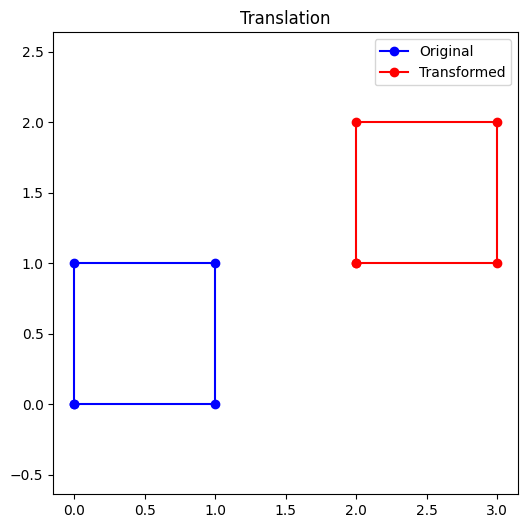

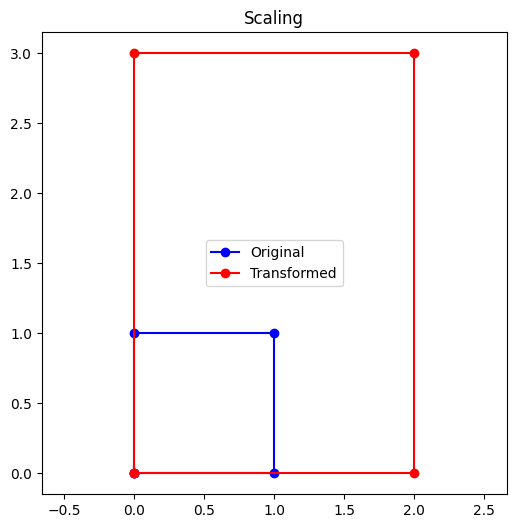

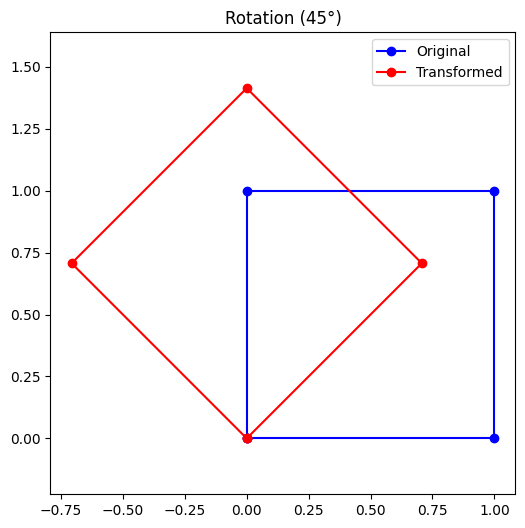

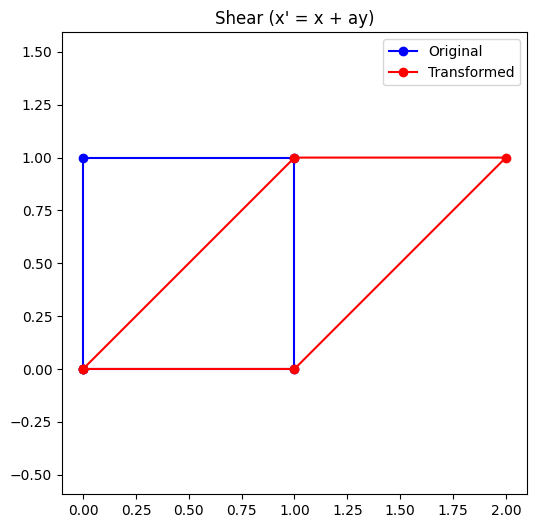

In [1]:

#Affine Transformations in Python
import numpy as np
import matplotlib.pyplot as plt
def affine_matrix(a11, a12, a13, a21, a22, a23):
    #Construct a 3x3 affine transformation matrix using homogeneous coordinates.
    return np.array([
        [a11, a12, a13],
        [a21, a22, a23],
        [0,   0,   1]
    ])
def apply_affine(points, matrix):
    # Convert points to homogeneous coordinates (N x 3)
    n = points.shape[0]
    homog_points = np.hstack([points, np.ones((n, 1))])

    # Apply transformation
    transformed = homog_points @ matrix.T

    # Convert back to 2D
    return transformed[:, :2]
def plot_points(original, transformed, title="Affine Transformation"):
    """Plot original and transformed points for visualization."""
    plt.figure(figsize=(6, 6))
    plt.plot(*original.T, "bo-", label="Original")
    plt.plot(*transformed.T, "ro-", label="Transformed")
    plt.legend()
    plt.axis("equal")
    plt.title(title)
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Define a square
    square = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]
    ])

    # Example 1: Translation
    T = affine_matrix(1, 0, 2,   # move x by +2
                      0, 1, 1)   # move y by +1
    translated = apply_affine(square, T)
    plot_points(square, translated, "Translation")

    # Example 2: Scaling
    S = affine_matrix(2, 0, 0,   # scale x by 2
                      0, 3, 0)   # scale y by 3
    scaled = apply_affine(square, S)
    plot_points(square, scaled, "Scaling")

    # Example 3: Rotation (θ = 45°)
    theta = np.radians(45)
    R = affine_matrix(np.cos(theta), -np.sin(theta), 0,
                      np.sin(theta),  np.cos(theta), 0)
    rotated = apply_affine(square, R)
    plot_points(square, rotated, "Rotation (45°)")

    # Example 4: Shear
    a = 1.0
    Sh = affine_matrix(1, a, 0,   # x' = x + ay
                       0, 1, 0)   # y' = y
    sheared = apply_affine(square, Sh)
    plot_points(square, sheared, "Shear (x' = x + ay)")


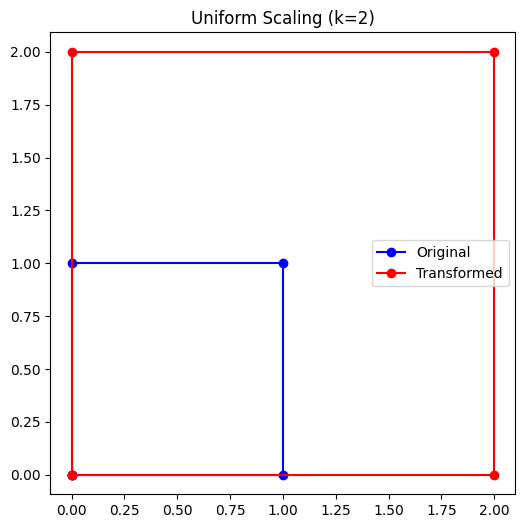

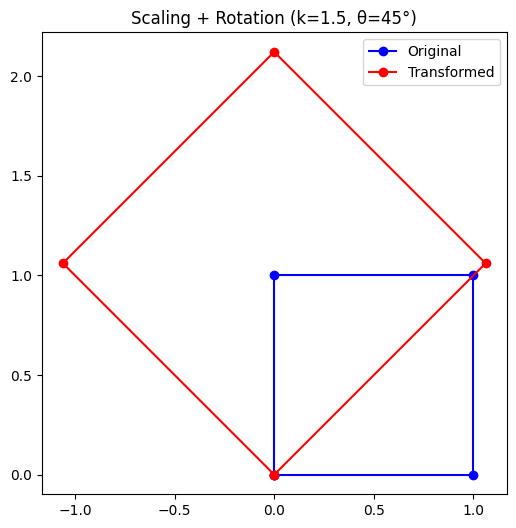

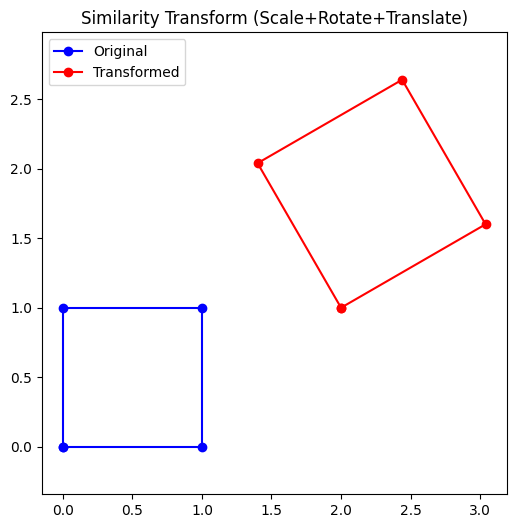

In [2]:
#Similarity Transformations in Python
import numpy as np
import matplotlib.pyplot as plt
def similarity_matrix(k, theta, tx=0, ty=0):
    return np.array([
        [k * np.cos(theta), -k * np.sin(theta), tx],
        [k * np.sin(theta),  k * np.cos(theta), ty],
        [0,                 0,                 1 ]
    ])
def apply_similarity(points, matrix):
    n = points.shape[0]
    homog_points = np.hstack([points, np.ones((n, 1))])
    transformed = homog_points @ matrix.T
    return transformed[:, :2]
def plot_points(original, transformed, title="Similarity Transformation"):
    """Plot original and transformed points."""
    plt.figure(figsize=(6, 6))
    plt.plot(*original.T, "bo-", label="Original")
    plt.plot(*transformed.T, "ro-", label="Transformed")
    plt.legend()
    plt.axis("equal")
    plt.title(title)
    plt.show()

# Example Usage

if __name__ == "__main__":
    # Define a square
    square = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]
    ])

    # Example 1: Pure scaling (k = 2)
    M_scale = similarity_matrix(k=2, theta=0)
    scaled = apply_similarity(square, M_scale)
    plot_points(square, scaled, "Uniform Scaling (k=2)")

    # Example 2: Scaling + rotation (k=1.5, θ=45°)
    M_rot_scale = similarity_matrix(k=1.5, theta=np.radians(45))
    rot_scaled = apply_similarity(square, M_rot_scale)
    plot_points(square, rot_scaled, "Scaling + Rotation (k=1.5, θ=45°)")

    # Example 3: Scaling + rotation + translation
    M_full = similarity_matrix(k=1.2, theta=np.radians(30), tx=2, ty=1)
    transformed = apply_similarity(square, M_full)
    plot_points(square, transformed, "Similarity Transform (Scale+Rotate+Translate)")


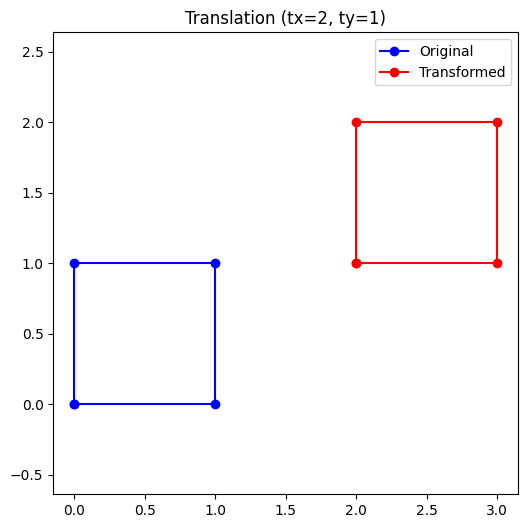

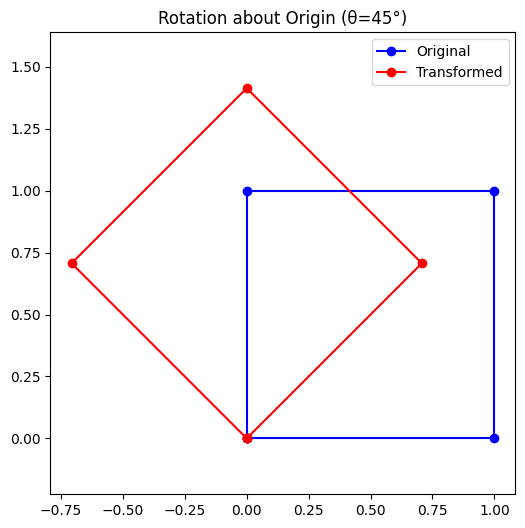

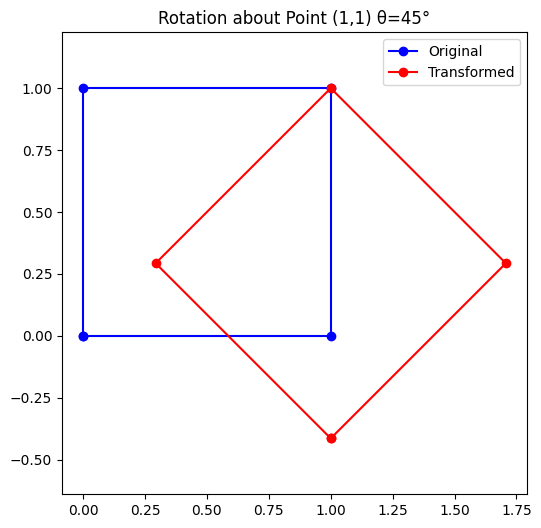

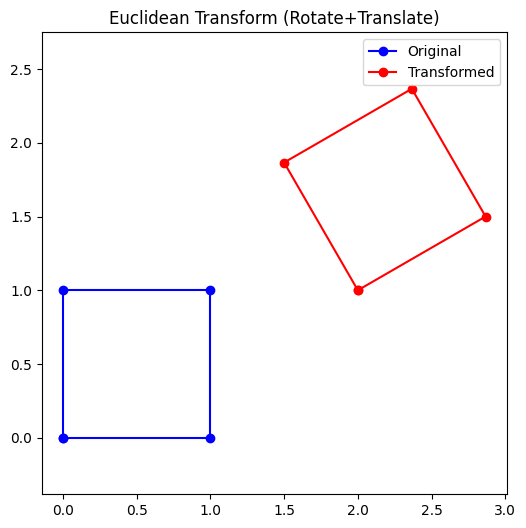

In [3]:
#Euclidean Transformations in Python
import numpy as np
import matplotlib.pyplot as plt
def euclidean_matrix(theta, tx=0, ty=0):
    return np.array([
        [np.cos(theta), -np.sin(theta), tx],
        [np.sin(theta),  np.cos(theta), ty],
        [0,             0,              1]
    ])


def rotation_about_point(theta, cx, cy):
    T1 = np.array([[1, 0, -cx],
                   [0, 1, -cy],
                   [0, 0, 1]])
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta),  np.cos(theta), 0],
                  [0,             0,              1]])
    T2 = np.array([[1, 0, cx],
                   [0, 1, cy],
                   [0, 0, 1]])
    return T2 @ R @ T1


def apply_transform(points, matrix):
    n = points.shape[0]
    homog_points = np.hstack([points, np.ones((n, 1))])
    transformed = homog_points @ matrix.T
    return transformed[:, :2]
def plot_points(original, transformed, title="Euclidean Transformation"):
    """Plot original and transformed points."""
    plt.figure(figsize=(6, 6))
    plt.plot(*original.T, "bo-", label="Original")
    plt.plot(*transformed.T, "ro-", label="Transformed")
    plt.legend()
    plt.axis("equal")
    plt.title(title)
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Define a square
    square = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]
    ])

    # Example 1: Translation only
    M_translate = euclidean_matrix(theta=0, tx=2, ty=1)
    translated = apply_transform(square, M_translate)
    plot_points(square, translated, "Translation (tx=2, ty=1)")

    # Example 2: Rotation about origin (θ=45°)
    M_rotate = euclidean_matrix(theta=np.radians(45))
    rotated = apply_transform(square, M_rotate)
    plot_points(square, rotated, "Rotation about Origin (θ=45°)")

    # Example 3: Rotation about point (cx=1, cy=1), θ=45°
    M_rot_point = rotation_about_point(theta=np.radians(45), cx=1, cy=1)
    rotated_point = apply_transform(square, M_rot_point)
    plot_points(square, rotated_point, "Rotation about Point (1,1) θ=45°")

    # Example 4: Rotation + Translation (θ=30°, tx=2, ty=1)
    M_full = euclidean_matrix(theta=np.radians(30), tx=2, ty=1)
    transformed = apply_transform(square, M_full)
    plot_points(square, transformed, "Euclidean Transform (Rotate+Translate)")


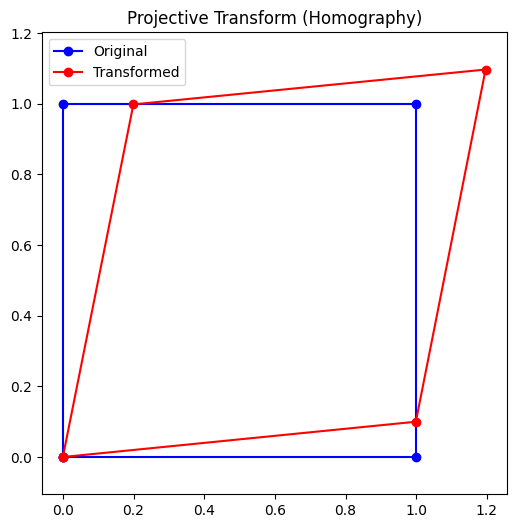

In [4]:
#Projective Transformations (Homography) in Python
import numpy as np
import matplotlib.pyplot as plt
def projective_matrix(h11, h12, h13,
                      h21, h22, h23,
                      h31, h32, h33):
    return np.array([
        [h11, h12, h13],
        [h21, h22, h23],
        [h31, h32, h33]
    ])
def apply_projective(points, H):
    n = points.shape[0]
    homog_points = np.hstack([points, np.ones((n, 1))])  # (N,3)
    transformed = homog_points @ H.T                     # (N,3)

    # Normalize by λ (last coordinate)
    transformed /= transformed[:, 2].reshape(-1, 1)

    return transformed[:, :2]
def plot_points(original, transformed, title="Projective Transformation"):
    """Plot original and transformed points."""
    plt.figure(figsize=(6, 6))
    plt.plot(*original.T, "bo-", label="Original")
    plt.plot(*transformed.T, "ro-", label="Transformed")
    plt.legend()
    plt.axis("equal")
    plt.title(title)
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Define a square
    square = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]
    ])

    # Example: Projective transformation (tilt)
    H = projective_matrix(
        1, 0.2, 0,   # h11, h12, h13
        0.1, 1, 0,   # h21, h22, h23
        0.001, 0.002, 1  # h31, h32, h33 (introduces perspective)
    )

    transformed = apply_projective(square, H)
    plot_points(square, transformed, "Projective Transform (Homography)")
